In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
# Try importing seaborn, if it fails we'll use matplotlib only
try:
    import seaborn as sns
    seaborn_available = True
except ImportError:
    seaborn_available = False
    print("Seaborn not available, using matplotlib only")

import numpy as np

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d rohitgrewal/restaurant-sales-data

Dataset URL: https://www.kaggle.com/datasets/rohitgrewal/restaurant-sales-data
License(s): DbCL-1.0
restaurant-sales-data.zip: Skipping, found more recently modified local copy (use --force to force download)


IMPORTING DATA

In [4]:
df=pd.read_csv('9. Sales-Data-Analysis.csv')

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


Cleaning the Data based on the Data Type

In [6]:
df.Manager.unique()

array(['Tom      Jackson', '       Pablo Perez', 'Joao    Silva',
       'Walter Muller', 'Remy    Monet', 'Remy Monet',
       '       Remy Monet', 'Remy     Monet', 'Pablo Perez',
       'Pablo   Perez', 'Pablo  Perez', 'Pablo    Perez', 'Joao Silva',
       'Tom Jackson'], dtype=object)

In [7]:
df['Manager'] = df['Manager'].str.strip().str.replace(r'\s+', ' ', regex = True) #remove extra spaces in names

In [8]:
df['Manager'].unique()

array(['Tom Jackson', 'Pablo Perez', 'Joao Silva', 'Walter Muller',
       'Remy Monet'], dtype=object)

In [9]:
df.Quantity = df.Quantity.astype(float)
df.Quantity = df.Quantity.round()
df.Quantity = df.Quantity.astype(int) #changing datatype of quantity to integer

In [10]:
df['Quantity']

0      573
1      746
2      200
3      570
4      201
      ... 
249    200
250    754
251    281
252    630
253    678
Name: Quantity, Length: 254, dtype: int64

In [11]:
df['Order ID'] = df['Order ID'].astype(int) #converting ORDER ID to integer and price to decimals
df['Price'] = df['Price'].astype(float)

In [12]:
df.Date.dtype #converting datatype of dates

dtype('O')

In [13]:
df.head()

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin


**ANALYZING DATA**

Some questions to ask about the Data given our variables

**Q1. Most selling product?**

In [14]:
df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

Product
Beverages             34988
Fries                 32023
Burgers               29018
Chicken Sandwiches    11133
Sides & Other          9800
Name: Quantity, dtype: int64

In [15]:
most_sold = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
most_sold = most_sold.reset_index()
most_sold

,Product,Quantity
0,Beverages,34988
1,Fries,32023
2,Burgers,29018
3,Chicken Sandwiches,11133
4,Sides & Other,9800


Text(0, 0.5, 'Quantity')

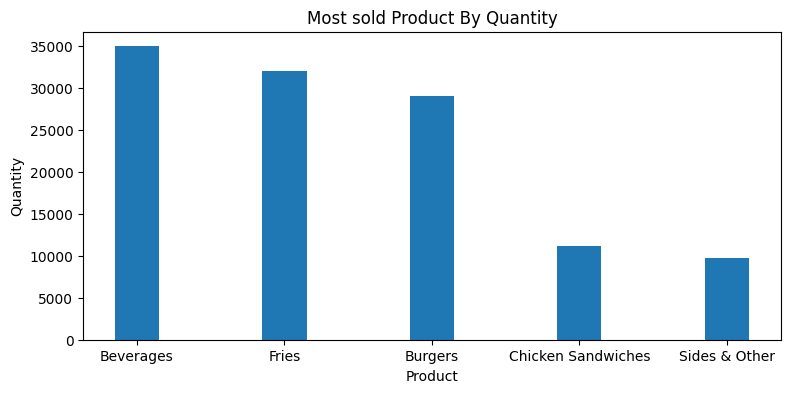

In [16]:
plt.figure(figsize = (9,4))
plt.bar(most_sold['Product'], most_sold['Quantity'], width=0.3)
plt.title("Most sold Product By Quantity")
plt.xlabel("Product")
plt.ylabel("Quantity")

We can see from the bar plot that the most sold item from our restaurants is beverages followed by fries

**Q2. Which City had the highest revenue?**

In [17]:
df.City.unique() #checking for the different cities for comparison

array(['London', 'Madrid', 'Lisbon', 'Berlin', 'Paris'], dtype=object)

In [18]:
df['Revenue'] = df['Price'] * df['Quantity'] #creating revenue column
df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

City
Lisbon    241635.49
London    211160.04
Madrid    136154.24
Berlin    100572.34
Paris      79777.33
Name: Revenue, dtype: float64

With this we can see that the city with the most revenue generated was Lisbon

**We can even check to see which manager was responsible for the most revenue based on the city they work in**

In [19]:
df.groupby('Manager')['Revenue'].sum().sort_values(ascending=False)

Manager
Joao Silva       241635.49
Tom Jackson      211160.04
Pablo Perez      136154.24
Walter Muller    100572.34
Remy Monet        79777.33
Name: Revenue, dtype: float64

In this case Joao Silva which is responsible for restaurant sales in the city of Lisbon has the highest revenue

**Q3. Average Revenue by Month**

In [20]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [21]:
df['Month'] = df['Date'].dt.month
df.Month.unique() #shows the unique value for months

array([11, 12], dtype=int32)

In [22]:
november = df[df['Month'] == 11] #this would show us the sales in the month of november
november

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue,Month
0,10452,2022-11-07,Fries,3.49,573,Online,Gift Card,Tom Jackson,London,1999.77,11
1,10453,2022-11-07,Beverages,2.95,746,Online,Gift Card,Pablo Perez,Madrid,2200.70,11
2,10454,2022-11-07,Sides & Other,4.99,200,In-store,Gift Card,Joao Silva,Lisbon,998.00,11
3,10455,2022-11-08,Burgers,12.99,570,In-store,Credit Card,Walter Muller,Berlin,7404.30,11
4,10456,2022-11-08,Chicken Sandwiches,9.95,201,In-store,Credit Card,Walter Muller,Berlin,1999.95,11
...,...,...,...,...,...,...,...,...,...,...,...
108,10568,2022-11-30,Beverages,2.95,678,Online,Credit Card,Tom Jackson,London,2000.10,11
109,10569,2022-11-30,Sides & Other,4.99,200,Online,Credit Card,Tom Jackson,London,998.00,11
127,10537,2022-11-24,Fries,3.49,630,Drive-thru,Credit Card,Pablo Perez,Madrid,2198.70,11
128,10538,2022-11-24,Beverages,2.95,746,Drive-thru,Credit Card,Pablo Perez,Madrid,2200.70,11


In [23]:
november.Revenue.mean() #this would show the average sale for all items in the month of november

2938.1869026548666

**If needed, averages for items can be specifically shown in the months or even weeks or days as well**

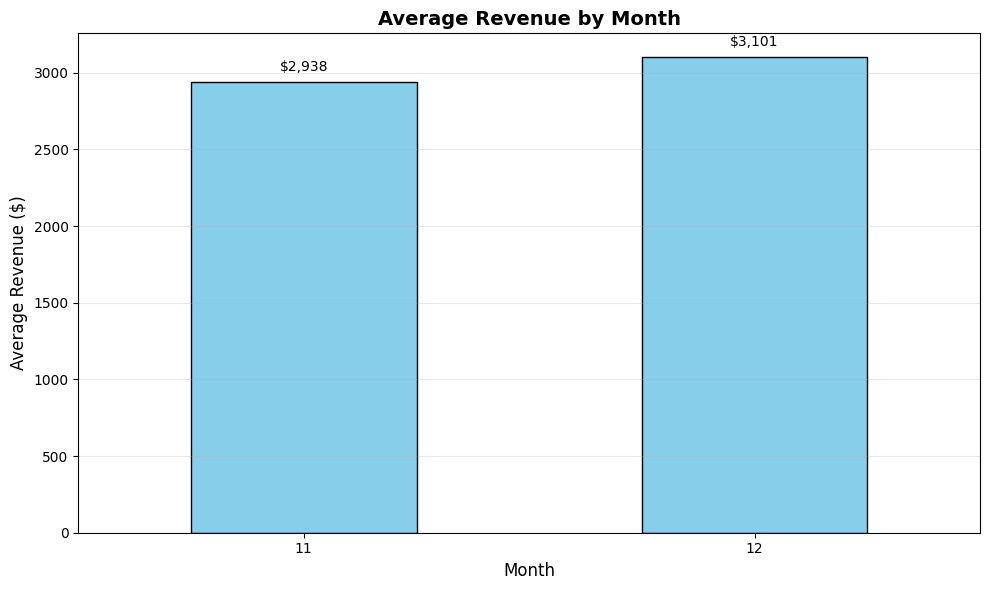

In [24]:
# Group by month and calculate average revenue
monthly_avg_revenue = df.groupby('Month')['Revenue'].mean()

# Create bar plot
plt.figure(figsize=(10, 6))
monthly_avg_revenue.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Revenue by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(monthly_avg_revenue):
    plt.text(i, v + 50, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

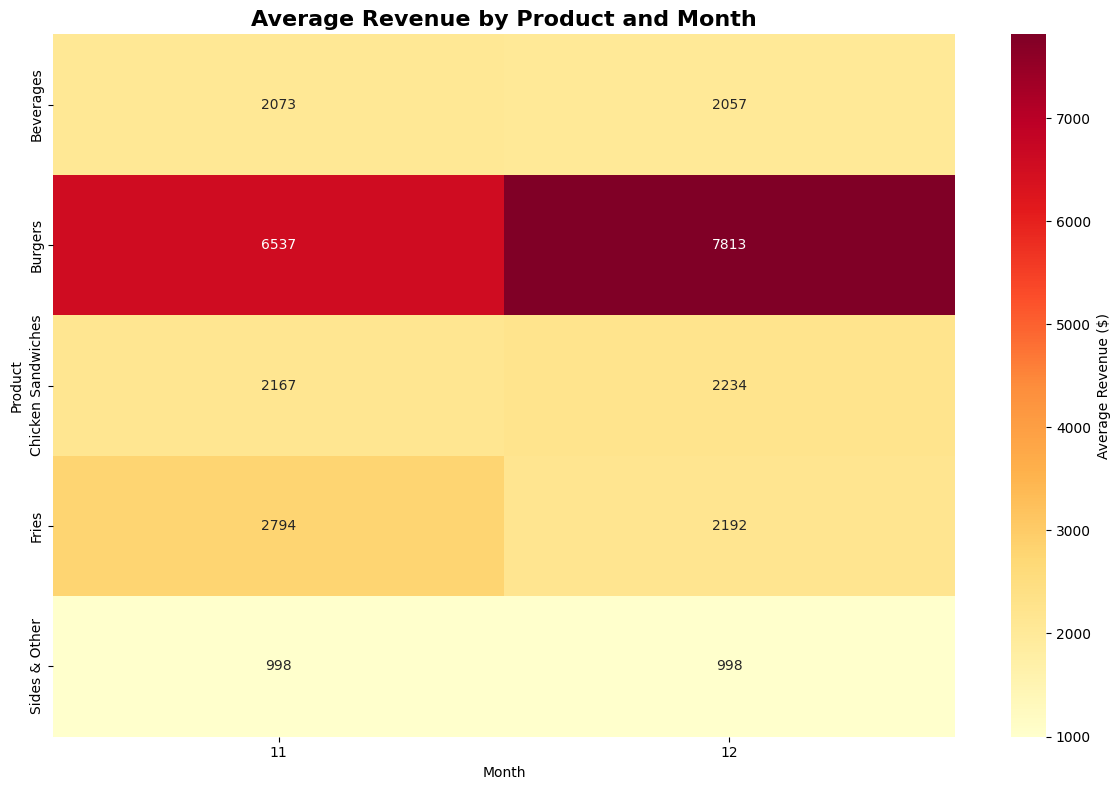

In [25]:
pivot_table = df.groupby(['Product', 'Month'])['Revenue'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Average Revenue ($)'})
plt.title('Average Revenue by Product and Month', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

From the heatmap we can kind of see the difference between the revenue generated for each different product between the months of november and december. It seems that the only significant change is for burgers which generated almost 1000$ more revenue between the two months

**Q4. Most Preferred Payment Method**

In [27]:
df['Payment Method'].unique()
df['Payment Method'].value_counts()

Payment Method
Credit Card    120
Cash            76
Gift Card       58
Name: count, dtype: int64

In [32]:
df['Payment Method'].value_counts(normalize=True)*100 #get percentages

Payment Method
Credit Card    47.244094
Cash           29.921260
Gift Card      22.834646
Name: proportion, dtype: float64

<Axes: xlabel='Payment Method'>

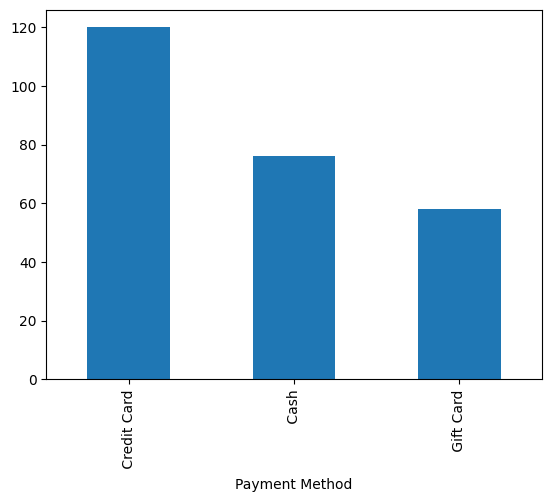

In [29]:
df['Payment Method'].value_counts().plot(kind='bar')

We can see that most people preferred to pay with a credit card with around 47% of the customer base, 30% of the customer base used cash and 23% used gift cards.

**Conclusion**

Overall this project was to take a look at sales data for a restaurant chain based on the type of data given. Most people paid with credit cards, the most revenue generating items are burgers and beverages, the average revenue for the chain of restaurants increase by about 3.3% between the months of november and december, and the manager doing the best is Joao Silva in Lisbon.

There's plenty more data analysis that could be done for this dataset but for the sake of this project the analysis will end here for now. With more data on for the upcoming months or perhaps the past few months of the restaurant sales data, a trend can be created for what type of items sells better in what season. Or creating machine learning patterns to see what customers are likely to order during what season or if sales for time of day data is given what customers are liklier to order at different times of day can be generalized as well.